# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [29]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [43]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | ikom
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | aqtobe
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | south venice
Processing Record 14 of Set 1 | maraa
Processing Record 15 of Set 1 | saint-joseph
Processing Record 16 of Set 1 | kargasok
Processing Record 17 of Set 1 | prince rupert
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | sinnamary
Processing Record 20 of Set 1 | vokhtoga
Processing Record 21 of Set 1 | kieta
Processing Record 22 of Set 1 | ribeira grande
Processing Record 23 of Set 1 | punta arenas
Process

Processing Record 36 of Set 4 | korla
Processing Record 37 of Set 4 | barrhead
Processing Record 38 of Set 4 | bolshaya murta
City not found. Skipping...
Processing Record 39 of Set 4 | hofn
Processing Record 40 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 41 of Set 4 | kahului
Processing Record 42 of Set 4 | araceli
Processing Record 43 of Set 4 | pevek
Processing Record 44 of Set 4 | powell
Processing Record 45 of Set 4 | lolua
City not found. Skipping...
Processing Record 46 of Set 4 | padang
Processing Record 47 of Set 4 | saldanha
Processing Record 48 of Set 4 | umm durman
City not found. Skipping...
Processing Record 49 of Set 4 | poso
Processing Record 0 of Set 5 | danville
Processing Record 1 of Set 5 | khash
Processing Record 2 of Set 5 | isla vista
Processing Record 3 of Set 5 | formoso do araguaia
City not found. Skipping...
Processing Record 4 of Set 5 | biak
Processing Record 5 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 6 

Processing Record 24 of Set 8 | ust-maya
Processing Record 25 of Set 8 | hanna
Processing Record 26 of Set 8 | duvan
Processing Record 27 of Set 8 | ilovlya
Processing Record 28 of Set 8 | apatou
Processing Record 29 of Set 8 | palaia fokaia
Processing Record 30 of Set 8 | namibe
Processing Record 31 of Set 8 | hobyo
Processing Record 32 of Set 8 | bac lieu
Processing Record 33 of Set 8 | bulgan
Processing Record 34 of Set 8 | aswan
Processing Record 35 of Set 8 | ahuimanu
Processing Record 36 of Set 8 | ust-kut
Processing Record 37 of Set 8 | montmagny
Processing Record 38 of Set 8 | addi ugri
City not found. Skipping...
Processing Record 39 of Set 8 | te anau
Processing Record 40 of Set 8 | mitsamiouli
Processing Record 41 of Set 8 | smolenka
Processing Record 42 of Set 8 | lingao
Processing Record 43 of Set 8 | nortelandia
Processing Record 44 of Set 8 | ust-nera
Processing Record 45 of Set 8 | mamlyutka
Processing Record 46 of Set 8 | kharp
Processing Record 47 of Set 8 | magliz
Ci

Processing Record 8 of Set 12 | shache
Processing Record 9 of Set 12 | rio gallegos
Processing Record 10 of Set 12 | mayo
Processing Record 11 of Set 12 | geraldton
Processing Record 12 of Set 12 | alotau
City not found. Skipping...
Processing Record 13 of Set 12 | tagab
Processing Record 14 of Set 12 | ntungamo
Processing Record 15 of Set 12 | mae ramat
Processing Record 16 of Set 12 | urumqi
Processing Record 17 of Set 12 | kalanchak
Processing Record 18 of Set 12 | rustenburg
Processing Record 19 of Set 12 | merrill
Processing Record 20 of Set 12 | awbari
Processing Record 21 of Set 12 | port macquarie
Processing Record 22 of Set 12 | penzance
Processing Record 23 of Set 12 | kysyl-syr
Processing Record 24 of Set 12 | lima
Processing Record 25 of Set 12 | visnes
Processing Record 26 of Set 12 | amberley
Processing Record 27 of Set 12 | quepos
Processing Record 28 of Set 12 | yenagoa
Processing Record 29 of Set 12 | ixtapa
Processing Record 30 of Set 12 | prince albert
Processing Rec

In [44]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [45]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,25.48,75,55,7.57,PF,1669838235
1,hobart,-42.8794,147.3294,11.81,73,75,0.00,AU,1669838440
2,ikom,5.9667,8.7063,25.82,55,80,1.41,NG,1669838226
3,saskylakh,71.9167,114.0833,-34.54,100,100,3.13,RU,1669838296
4,aqtobe,50.2797,57.2072,-11.95,72,0,1.00,KZ,1669838226


In [47]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [48]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,25.48,75,55,7.57,PF,1669838235
1,hobart,-42.8794,147.3294,11.81,73,75,0.00,AU,1669838440
2,ikom,5.9667,8.7063,25.82,55,80,1.41,NG,1669838226
3,saskylakh,71.9167,114.0833,-34.54,100,100,3.13,RU,1669838296
4,aqtobe,50.2797,57.2072,-11.95,72,0,1.00,KZ,1669838226


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

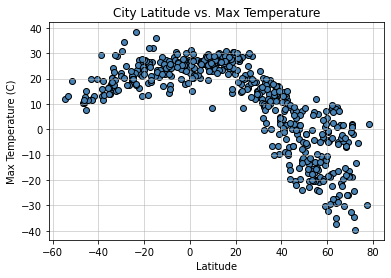

In [58]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

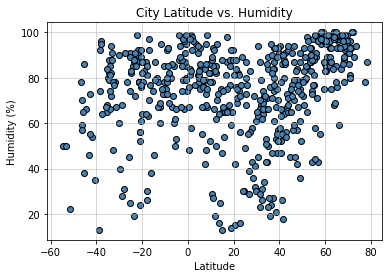

In [60]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor = "steelblue", edgecolor = "black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

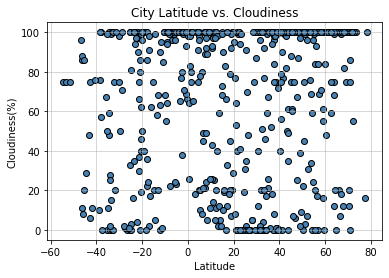

In [62]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

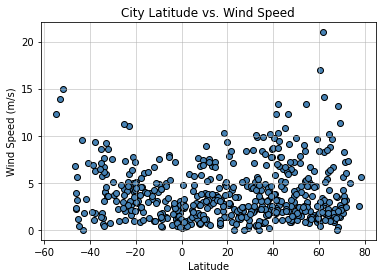

In [64]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [153]:
# Define a function to create Linear Regression plots
def lin_regress(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    print(f"The r-value is: {rvalue**2}")
    return line_eq
#Define function to annotate regression plot
def annotate(line_eq, x, y):
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")
    


In [154]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ikom,5.9667,8.7063,25.82,55,80,1.41,NG,1669838226
3,saskylakh,71.9167,114.0833,-34.54,100,100,3.13,RU,1669838296
4,aqtobe,50.2797,57.2072,-11.95,72,0,1.00,KZ,1669838226
5,tasiilaq,65.6145,-37.6368,1.68,96,100,9.68,GL,1669838316
7,albany,42.6001,-73.9662,11.64,91,100,2.68,US,1669838286


In [155]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,25.48,75,55,7.57,PF,1669838235
1,hobart,-42.8794,147.3294,11.81,73,75,0.00,AU,1669838440
6,chuy,-33.6971,-53.4616,24.18,72,15,7.62,UY,1669838441
10,ushuaia,-54.8000,-68.3000,11.81,50,75,12.35,AR,1669838229
13,maraa,-1.8333,-65.3667,30.25,66,100,0.45,BR,1669838230


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7031047657713505


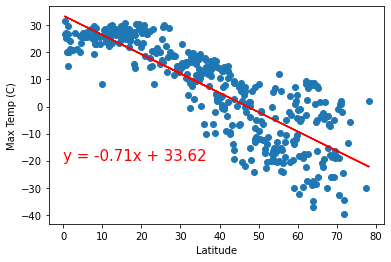

In [159]:
# Linear regression on Northern Hemisphere
plot = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

#Annotate regression
annotate(plot, 0,-20)



The r-value is: 0.3434879138801734


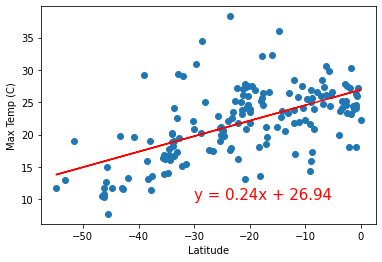

In [165]:
# Linear regression on Southern Hemisphere
plot = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")

#Annotate regression
annotate(plot, -30,10)

**Discussion about the linear relationship:** 
In the Northern Hemisphere there is a pretty strong correlation between latitude and max temps with an r-value of 0.703, this tells us that as the latitude gets higher our Max Temps drops.
    
In the Southern hemisphere we have a weak correlation between Max Temps and Latitude with an r-value of 0.343, still we see that as latitude increases our Max Temps Rise.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.09965475933057102


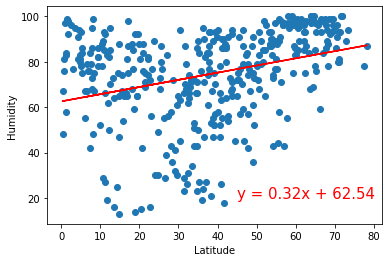

In [172]:
# Northern Hemisphere
plot = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Annotate regression
annotate(plot, 45,20)

The r-value is: 0.10076229220561357


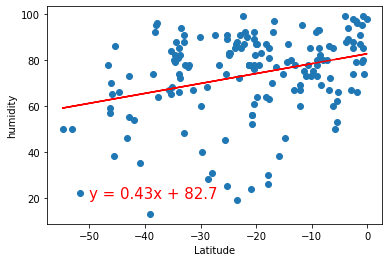

In [173]:
# Southern Hemisphere
plot = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("humidity")

#Annotate regression
annotate(plot, -50,20)

**Discussion about the linear relationship:** In the Northern Hemisphere there is not a significant correlation between latitude and humidity with an r-value of 0.100, we can see in the graph that the correlation is there but the results seem to vary with no signifact relationship to each other 

In the Southern hemisphere we have essentially the same correlation with an r-value of 0.101, the graphs dont change much in appearnce once again the correlation can be seen but is weak and many points on the plot dont seem to follow it.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03827489922135806


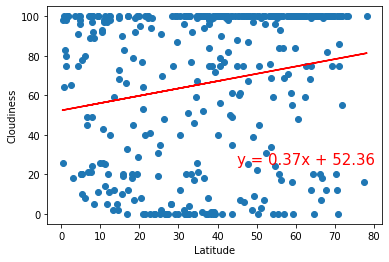

In [175]:
# Northern Hemisphere
plot = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Annotate regression
annotate(plot, 45,25)

The r-value is: 0.09146174017459055


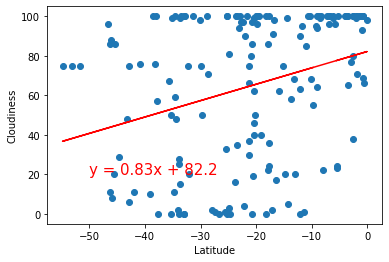

In [176]:
# Southern Hemisphere
plot = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Annotate regression
annotate(plot, -50,20)

**Discussion about the linear relationship:** In the Northern Hemisphere there is no correlation between latitude and Cloudiness with an r-value of 0.038.

In the Southern hemisphere there is no significant correlation between latitude and Cloudiness with an r-value of 0.091.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.017514434822392896


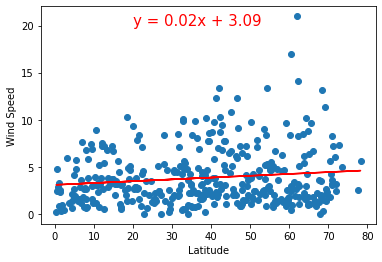

In [180]:
# Northern Hemisphere
plot = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Annotate regression
annotate(plot, 20,20)

The r-value is: 0.13750863643757263


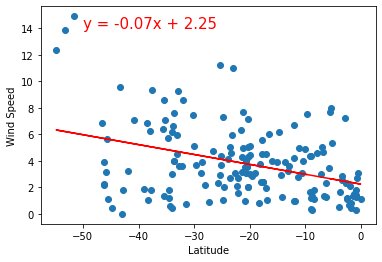

In [178]:
# Southern Hemisphere
plot = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Annotate regression
annotate(plot, -50,14)

**Discussion about the linear relationship:** In the Northern Hemisphere there is not a significant correlation between latitude and Wind Speed with an r-value of 0.018, despite that from seeing the graph it seems like in general wind speeds are lower.

In the Southern hemisphere there is a slightly higher correlation but still not significant with an r-value of 0.138.